In [1]:
!pip install -Uqqq pip --progress-bar off
!pip install -Uqqq gdown --progress-bar off

In [5]:
!gdown 1tMYar9-XcNZ1Nz5xaxFyi-iYIkW4Ey_k

Downloading...
From: https://drive.google.com/uc?id=1tMYar9-XcNZ1Nz5xaxFyi-iYIkW4Ey_k
To: /content/penguins.csv
100% 15.2k/15.2k [00:00<00:00, 26.8MB/s]


In [6]:
import torch
from torch import nn
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [7]:
df = pd.read_csv(r'penguins.csv').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [8]:
df.shape

(333, 8)

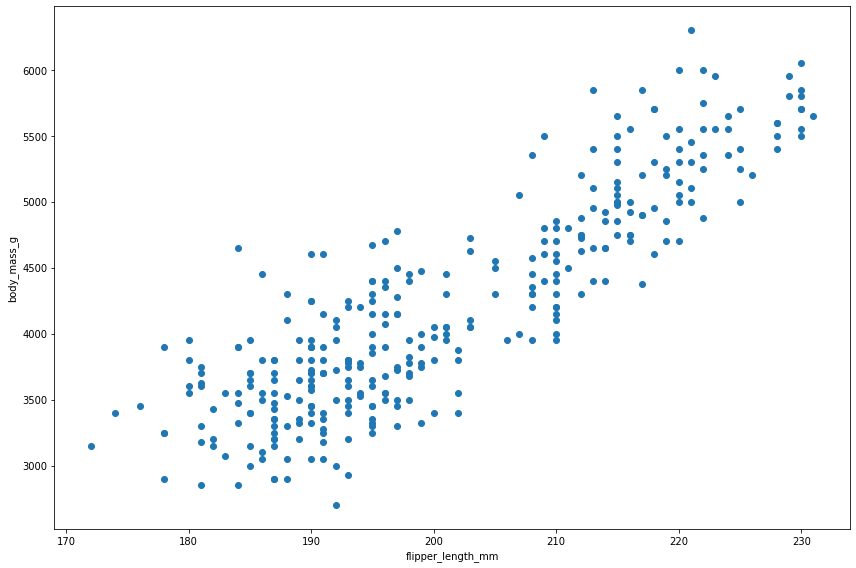

In [10]:
df.plot.scatter('flipper_length_mm', 'body_mass_g', figsize=(12, 8), s=36);
plt.tight_layout()

In [11]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.tensor(1.0), requires_grad=True)
        self.bias = nn.Parameter(torch.tensor(1.0), requires_grad=True)
 
    def forward(self, data: torch.Tensor) -> torch.Tensor:
        return self.weights * data + self.bias

In [12]:
model = SimpleLinearRegression()

In [13]:
for name, param in model.named_parameters():
    print(name, param.data)

weights tensor(1.)
bias tensor(1.)


In [14]:
flipper_length = torch.tensor(df.flipper_length_mm.to_numpy())
body_mass = torch.tensor(df.body_mass_g.to_numpy())
flipper_length.shape, body_mass.shape

(torch.Size([333]), torch.Size([333]))

In [15]:
predicted_mass = model(flipper_length)

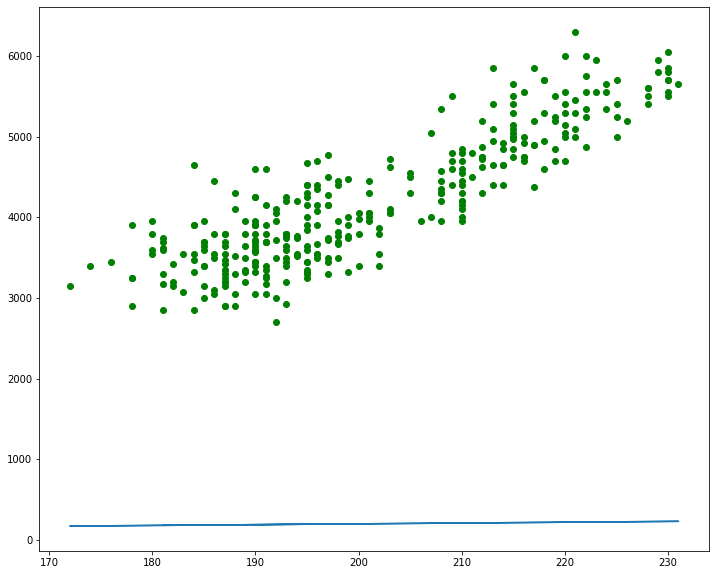

In [16]:
plt.figure(figsize=(12, 10))
plt.scatter(flipper_length.detach().numpy(), body_mass.numpy(), color='g')
plt.plot(flipper_length.detach().numpy(), predicted_mass.detach().numpy());

In [17]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [18]:
losses = []
for i in tqdm(range(10000)):
    predicted_mass = model(flipper_length)
 
    loss = loss_fn(predicted_mass, body_mass)
    losses.append(loss.item())
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████| 10000/10000 [00:06<00:00, 1570.39it/s]


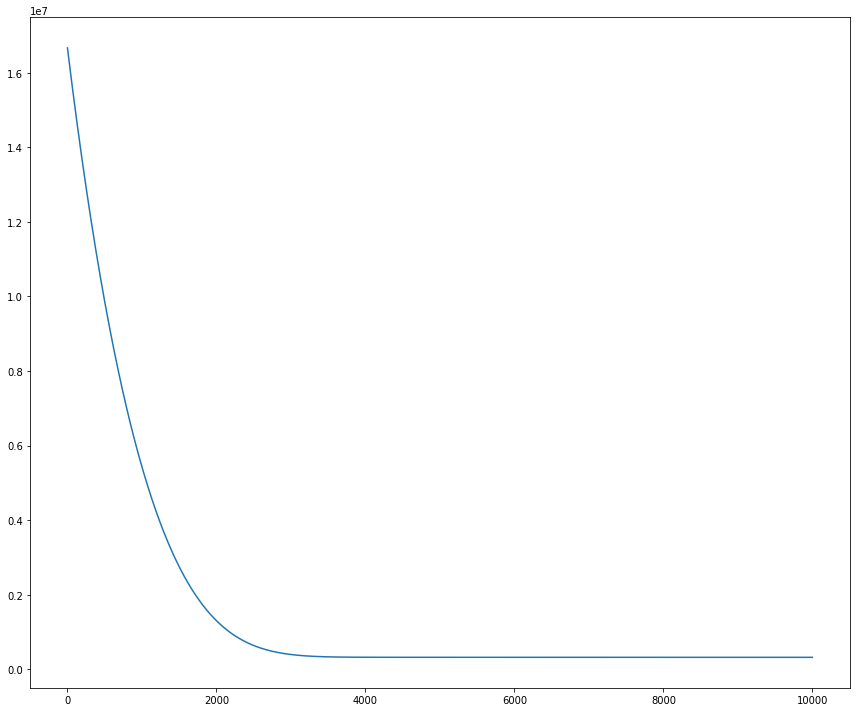

In [19]:
plt.figure(figsize=(12, 10))
plt.plot(losses)
plt.tight_layout();

In [20]:
predictions = model(flipper_length)

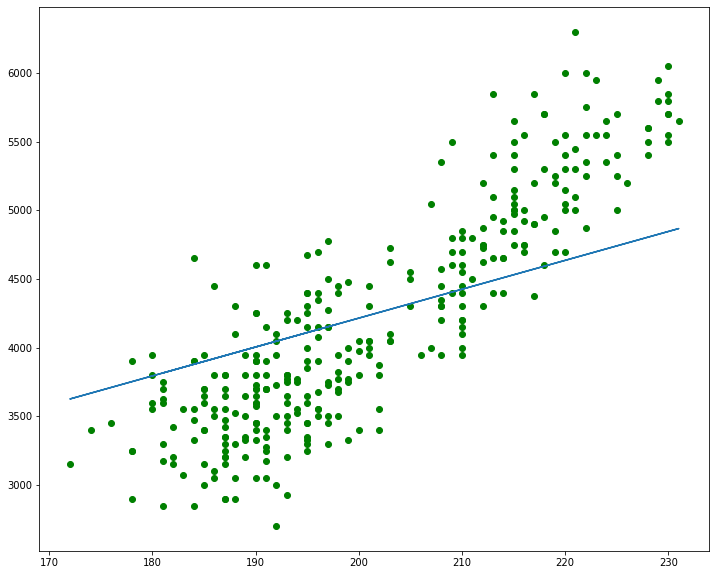

In [21]:
plt.figure(figsize=(12, 10))
plt.scatter(flipper_length.detach().numpy(), body_mass.numpy(), color='g')
plt.plot(flipper_length.detach().numpy(), predictions.detach().numpy());